# Dataset Loading and Preprocessing

Dataset Link: https://www.kaggle.com/datasets/corrieaar/apartment-rental-offers-in-germany

In [1]:
import pandas as pd
import numpy as np

In [2]:
root = 'datasets/'
df = pd.read_csv(root + 'immo_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [6]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,2.688500e+05,268850.000000,268850.000000,268850.000000,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,6.941294e+02,74.355548,3.765256,37283.022235,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,1.953602e+04,254.759208,2.214357,27798.037296,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,0.000000e+00,0.000000,1.000000,852.000000,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,3.380000e+02,54.000000,2.000000,9128.000000,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,4.900000e+02,67.320000,3.000000,38667.000000,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,7.990000e+02,87.000000,5.000000,57072.000000,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,9.999999e+06,111111.000000,9.000000,99998.000000,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


## Drop Columns with more than 50% nan data

In [7]:
ndf = df.drop(df.columns[(df.isna().sum()/len(df)) > 0.50], axis=1)
ndf.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3', 'description',
       'facilities', 'date'],
      dtype='object')

## Drop Unneecessary Columns

In [8]:
unnecessary = ['yearConstructed', 'scoutId', 'houseNumber', 'livingSpace', 'street', 
    'streetPlain', 'baseRentRange', 'noRooms', 'thermalChar', 'regio2', 'description', 'facilities', 'date', 'geo_plz', 'regio3', 'geo_bln']
ndf = ndf.drop(columns=unnecessary)
ndf.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'firingTypes', 'hasKitchen',
       'cellar', 'yearConstructedRange', 'baseRent', 'geo_krs', 'condition',
       'interiorQual', 'petsAllowed', 'lift', 'typeOfFlat', 'floor',
       'numberOfFloors', 'noRoomsRange', 'garden', 'livingSpaceRange'],
      dtype='object')

## Handeling Categorical Features with too much values

In [9]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                268850 non-null  object 
 1   serviceCharge         261941 non-null  float64
 2   heatingType           223994 non-null  object 
 3   telekomTvOffer        236231 non-null  object 
 4   newlyConst            268850 non-null  bool   
 5   balcony               268850 non-null  bool   
 6   picturecount          268850 non-null  int64  
 7   pricetrend            267018 non-null  float64
 8   telekomUploadSpeed    235492 non-null  float64
 9   totalRent             228333 non-null  float64
 10  firingTypes           211886 non-null  object 
 11  hasKitchen            268850 non-null  bool   
 12  cellar                268850 non-null  bool   
 13  yearConstructedRange  211805 non-null  float64
 14  baseRent              268850 non-null  float64
 15  

In [10]:
def combineRegio1(x, others):
    if x in others:
        return 'other'
    else:
        return x

def combineHeatingType(x, others):
    if x in others:
        return 'other'
    else:
        return x

def combineFiringType(x, others):
    if x in others:
        return 'other'
    else:
        return x

def combineGeoKrs(x, others):
    if x in others:
        return 'other'
    else:
        return x

def combineCondition(x, others):
    if x in others:
        return 'other'
    else:
        return x

def binFloor(x, others):
    if x == np.nan:
        return np.nan
    elif x < 0:
        return -1
    elif 0 <= x and x <= 4:
        return x
    elif x < 10:
        return 5
    elif x < 50:
        return 6
    else:
        return 7

def binNFloors(x, others):
    # print(x, type(x))
    if x == np.nan:
        return np.nan
    elif 0 <= x and x <= 1:
        return 0
    elif x <= 3:
        return 1
    elif x < 10:
        return 2
    else:
        return 3


preprocess = [('regio1', combineRegio1, ndf.regio1.value_counts()[ndf.regio1.value_counts() < 10000].index.tolist()),
              ('heatingType', combineHeatingType, ndf.heatingType.value_counts()[ndf.heatingType.value_counts() < 3000].index.tolist()),
              ('firingTypes', combineFiringType, ndf.firingTypes.value_counts()[ndf.firingTypes.value_counts() < 10000].index.tolist()),
              ('geo_krs', combineGeoKrs, ndf.geo_krs.value_counts()[ndf.geo_krs.value_counts() < 3000].index.tolist()),
              ('condition', combineCondition, ndf.condition.value_counts()[ndf.condition.value_counts() < 10000].index.tolist()),
              ('floor', binFloor, None),
              ('numberOfFloors', binNFloors, None)]

In [11]:
ndf_mult = ndf.copy()
ndf_dask = ndf.copy()

In [12]:
import time

In [13]:
n_proc = 8

### Normal

In [14]:
start = time.time()
for p in preprocess:
    ndf[p[0]] = ndf[p[0]].apply(lambda x: p[1](x, p[2]))
print(time.time() - start)

1.7264292240142822


### Multiprocessing

In [15]:
import multiprocessing as mp
import workers

In [16]:
workers.preprocess = preprocess

In [17]:
if __name__ ==  '__main__': 
    start = time.time()
    pool = mp.Pool(processes=n_proc)
    splits = [ndf_mult.iloc[i:i+int(len(ndf_mult)/n_proc),:] for i in range(0, int(len(ndf_mult)/n_proc)*(n_proc-1), int(len(ndf_mult)/n_proc))]
    splits.append(ndf_mult.iloc[int(len(ndf_mult)/n_proc)*(n_proc-1):,:])
    start_m = time.time()
    pool.map(workers.apply_process, splits)
    print(time.time() - start_m)
    pool.close()
    pool.join()
    pd.concat(splits, axis=0)
    print(time.time() - start)

1.782233476638794
2.1903791427612305


### Dask

In [18]:
import dask
import dask.dataframe as dd

In [19]:
start = time.time()
for p in preprocess:
    ds = dd.from_pandas(ndf_dask[p[0]], npartitions=n_proc)
    ds = ds.apply(lambda x: p[1](x, p[2]), meta = ds)
    ndf_dask[p[0]] = ds.compute()
print(time.time() - start)

1.6497316360473633


## Removing Illogical and nan values in totalRent column

In [20]:
ndf.totalRent.dropna(inplace=True)
ndf.drop(ndf[ndf.totalRent == 0.0].index, inplace=True)

## Handeling nan data

In [21]:
mostRepeted = ndf.columns.to_numpy()[(ndf.columns.dtype == 'object') | (ndf.columns.dtype == 'bool')][0].tolist()
mostRepeted.extend(['yearConstructedRange', 'floor', 'numberOfFloors'])

for cols in mostRepeted:
    ndf[cols].fillna(ndf[cols].value_counts().head(1).index[0],inplace = True)

ndf.fillna(ndf._get_numeric_data().mean(),inplace = True)

## Changing datatypes

In [22]:
numeric_cats = ['yearConstructedRange', 'floor', 'numberOfFloors', 'noRoomsRange', 'livingSpaceRange', 'telekomUploadSpeed']

for col in ndf.columns:
    if (ndf[col].dtype == 'object'):
        ndf[col] = ndf[col].astype('category')
for col in numeric_cats:
    ndf[col] = ndf[col].astype('int8')

## Visualizing Data Distributions

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df_numerics = [col for col in ndf.columns if (ndf[col].dtype == np.int64 or ndf[col].dtype == np.float64)]
df_categories = [col for col in ndf.columns if not (ndf[col].dtype == np.int64 or ndf[col].dtype == np.float64)]

C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a de

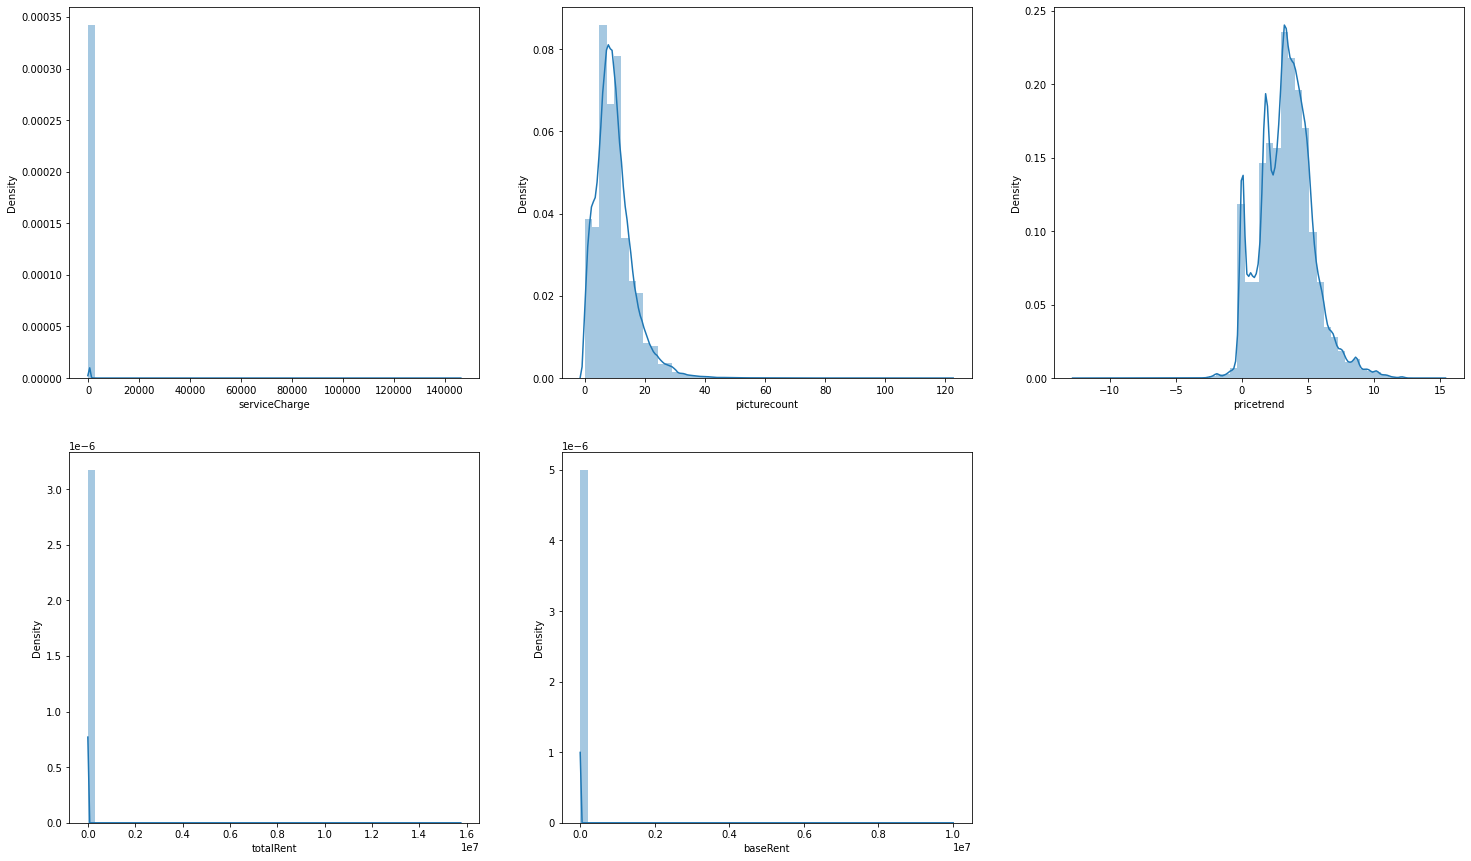

In [25]:
n_rows=2
n_cols=3
plt.figure(figsize=(25, 15))
for i, column in enumerate(df_numerics):
    plt.subplot(n_rows, n_cols, i+1)
    sns.distplot(ndf[column])
plt.show()

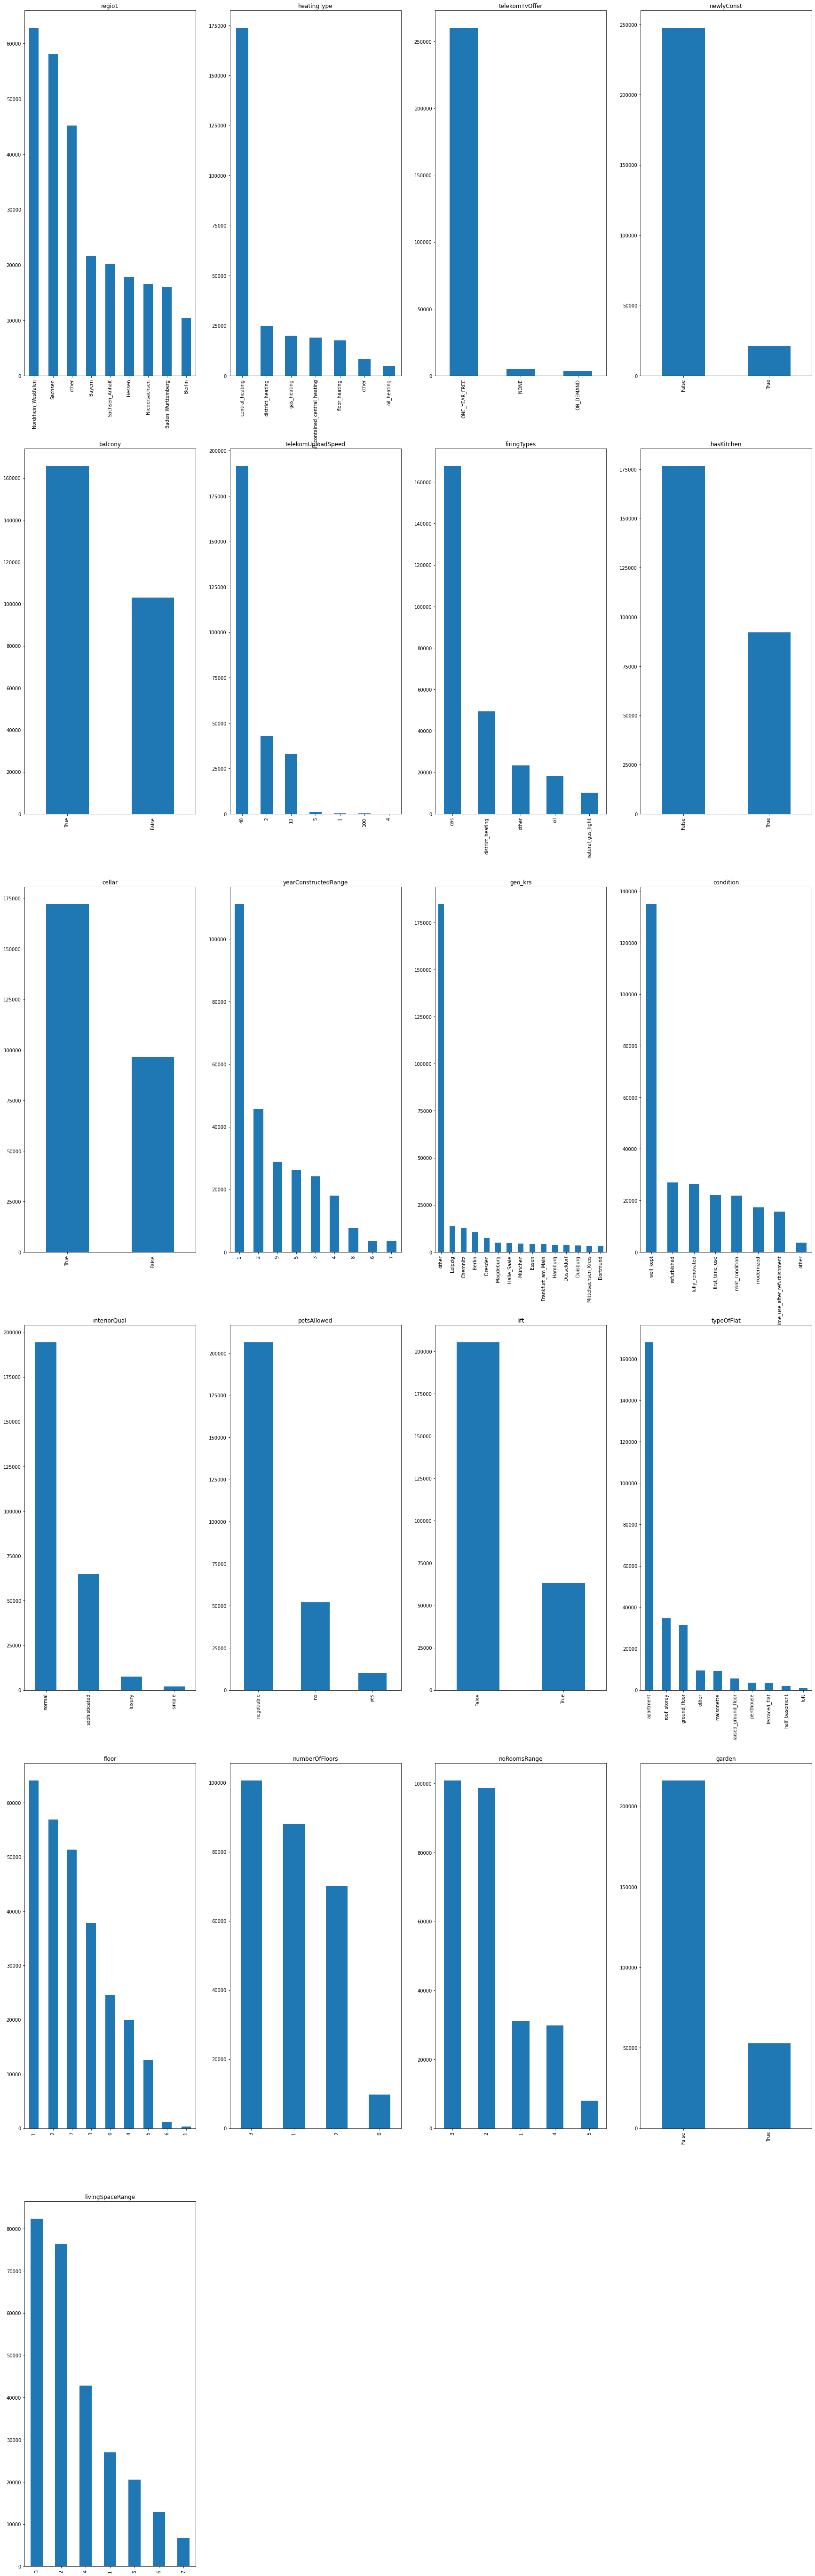

In [26]:
n_rows=6
n_cols=4
plt.figure(figsize=(30, 100))
for i, column in enumerate(df_categories):
    plt.subplot(n_rows, n_cols, i+1)
    ndf[column].value_counts().plot.bar(title=column)
plt.show()

## Removing Outliers by IQR
(since most columns have skewed distribution)

C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid pos

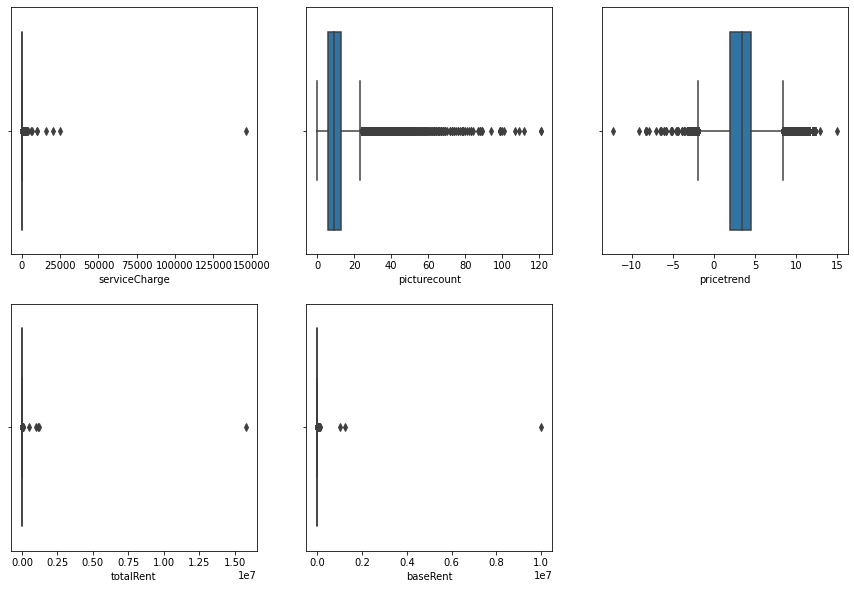

In [27]:
n_rows=2
n_cols=3
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numerics):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(ndf[column])
plt.show()

In [28]:
for col in df_numerics:
    percentile25 = ndf[col].quantile(0.25)
    percentile75 = ndf[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    ndf = ndf[(ndf[col] >= lower_limit) & (ndf[col] <= upper_limit)]
ndf.shape

(222497, 26)

C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid pos

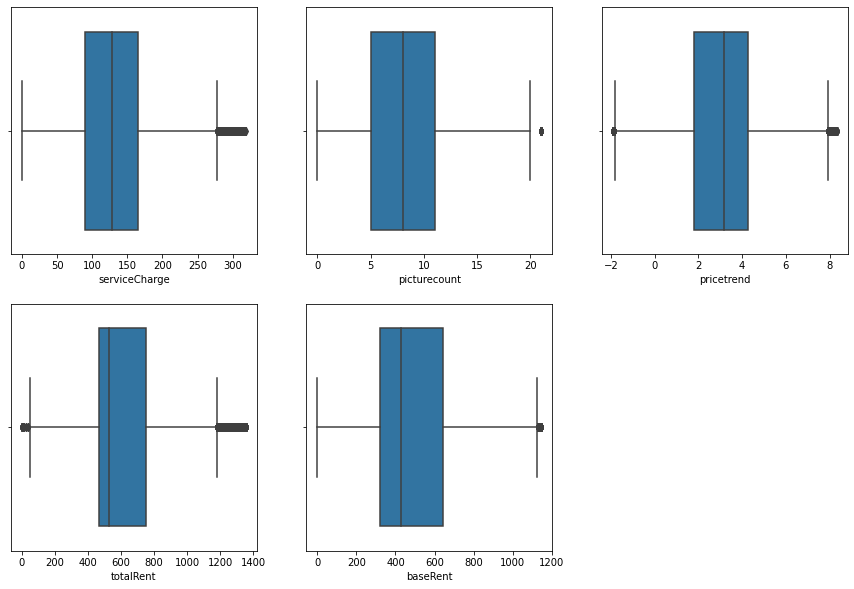

In [29]:
n_rows=2
n_cols=3
plt.figure(figsize=(15, 10))
for i, column in enumerate(df_numerics):
    plt.subplot(n_rows, n_cols, i+1)
    sns.boxplot(ndf[column])
plt.show()

# Data Visualization and Analysis

C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a de

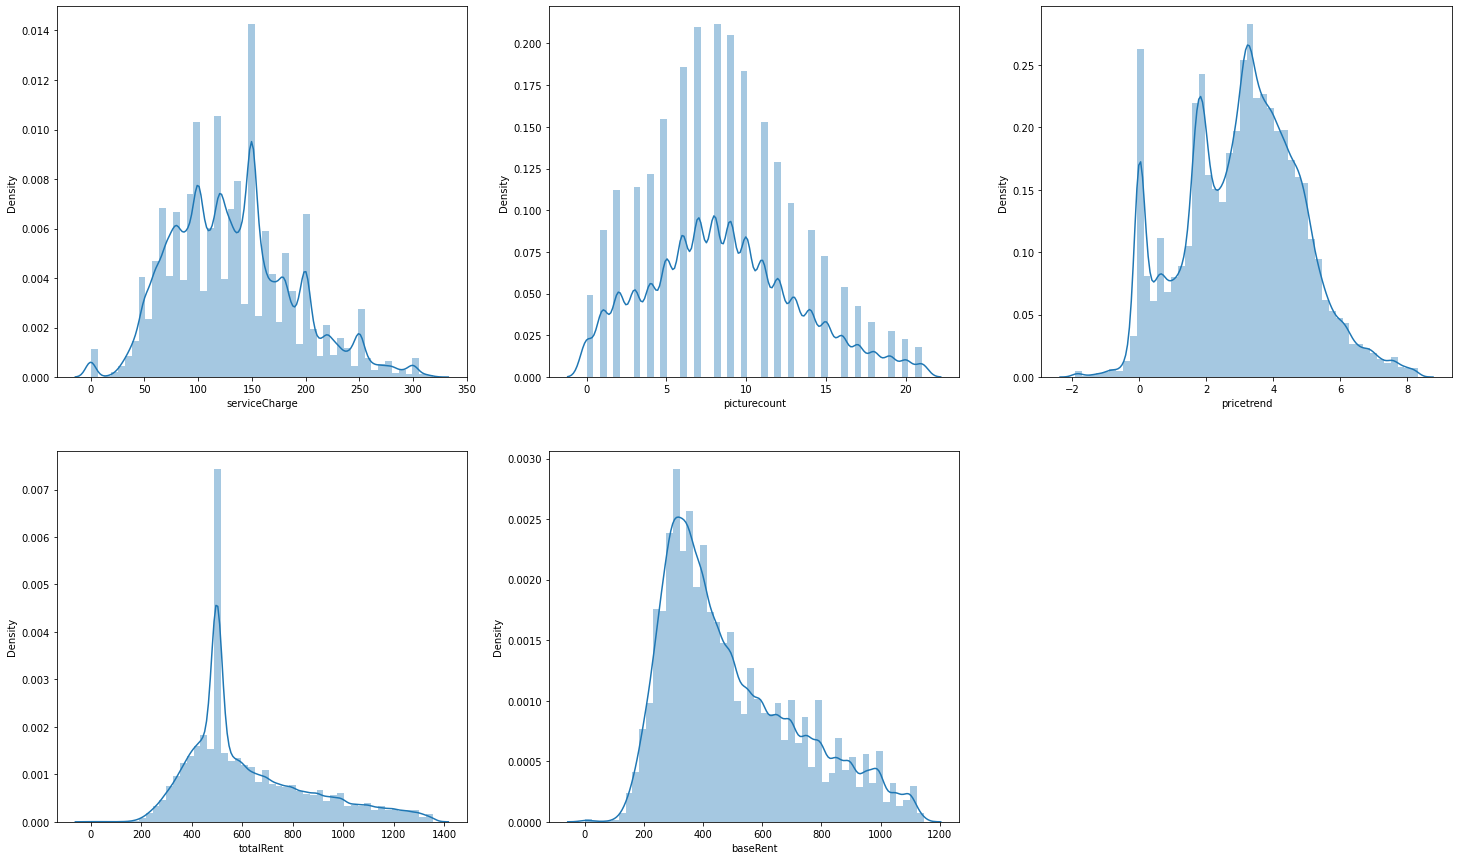

In [30]:
n_rows=2
n_cols=3
plt.figure(figsize=(25, 15))
for i, column in enumerate(df_numerics):
    plt.subplot(n_rows, n_cols, i+1)
    sns.distplot(ndf[column])
plt.show()

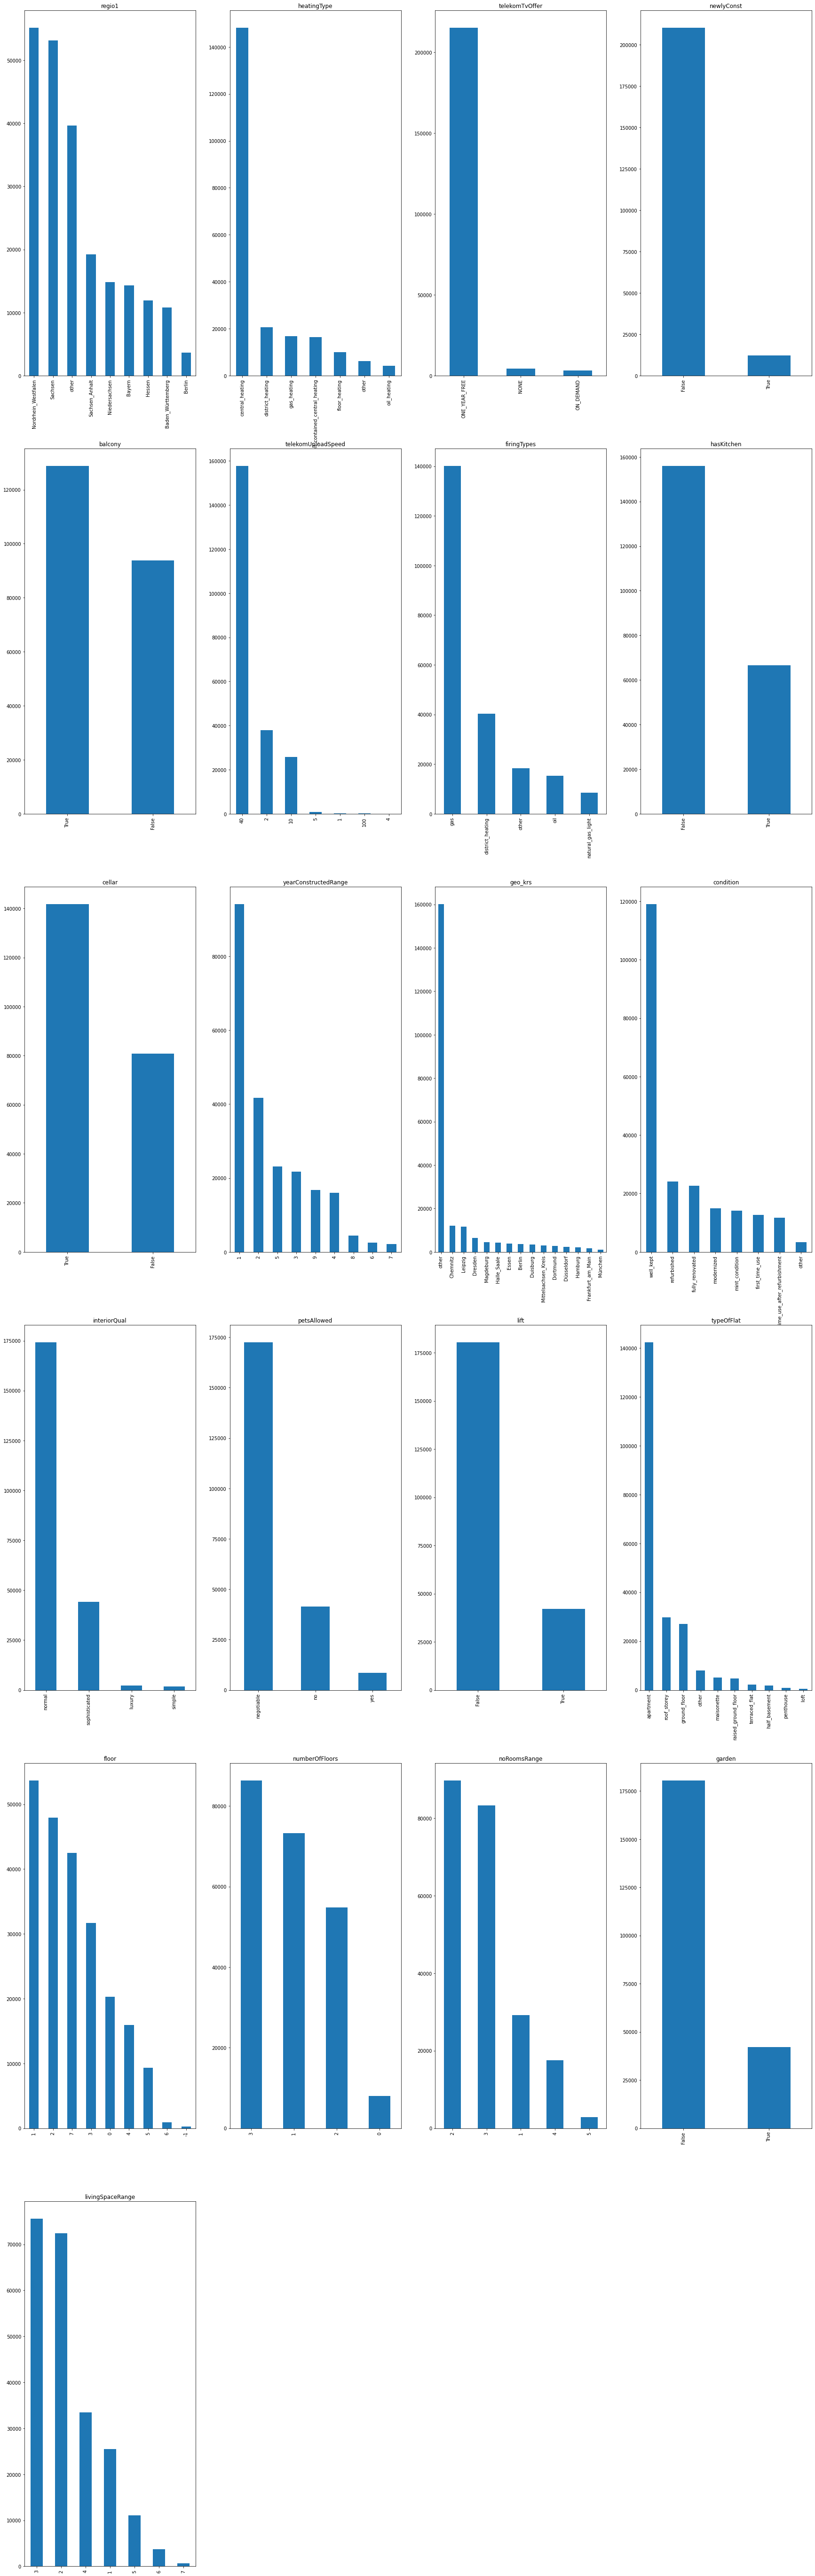

In [31]:
n_rows=6
n_cols=4
plt.figure(figsize=(30, 100))
for i, column in enumerate(df_categories):
    plt.subplot(n_rows, n_cols, i+1)
    ndf[column].value_counts().plot.bar(title=column)
plt.show()

In [32]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222497 entries, 0 to 268849
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   regio1                222497 non-null  category
 1   serviceCharge         222497 non-null  float64 
 2   heatingType           222497 non-null  category
 3   telekomTvOffer        222497 non-null  category
 4   newlyConst            222497 non-null  bool    
 5   balcony               222497 non-null  bool    
 6   picturecount          222497 non-null  int64   
 7   pricetrend            222497 non-null  float64 
 8   telekomUploadSpeed    222497 non-null  int8    
 9   totalRent             222497 non-null  float64 
 10  firingTypes           222497 non-null  category
 11  hasKitchen            222497 non-null  bool    
 12  cellar                222497 non-null  bool    
 13  yearConstructedRange  222497 non-null  int8    
 14  baseRent              222497 non-nul

In [33]:
ndf.describe()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructedRange,baseRent,floor,numberOfFloors,noRoomsRange,livingSpaceRange
count,222497.000000,222497.000000,222497.000000,222497.000000,222497.000000,222497.000000,222497.000000,222497.000000,222497.000000,222497.000000,222497.000000
mean,131.782981,8.535702,3.064831,29.919671,621.919590,2.868870,495.309818,2.954858,1.986975,2.438864,2.756356
std,55.898803,4.651479,1.743165,16.015356,243.109236,2.409369,227.433137,2.313423,0.927943,0.861119,1.126784
min,0.000000,0.000000,-1.920000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,1.000000,1.000000
25%,90.000000,5.000000,1.820000,10.000000,469.000000,1.000000,320.000000,1.000000,1.000000,2.000000,2.000000
50%,128.000000,8.000000,3.170000,40.000000,527.000000,2.000000,430.000000,2.000000,2.000000,2.000000,3.000000
75%,165.000000,11.000000,4.260000,40.000000,753.980000,4.000000,642.500000,4.000000,3.000000,3.000000,3.000000
max,318.500000,21.000000,8.320000,100.000000,1355.000000,9.000000,1145.000000,7.000000,3.000000,5.000000,7.000000


<AxesSubplot:>

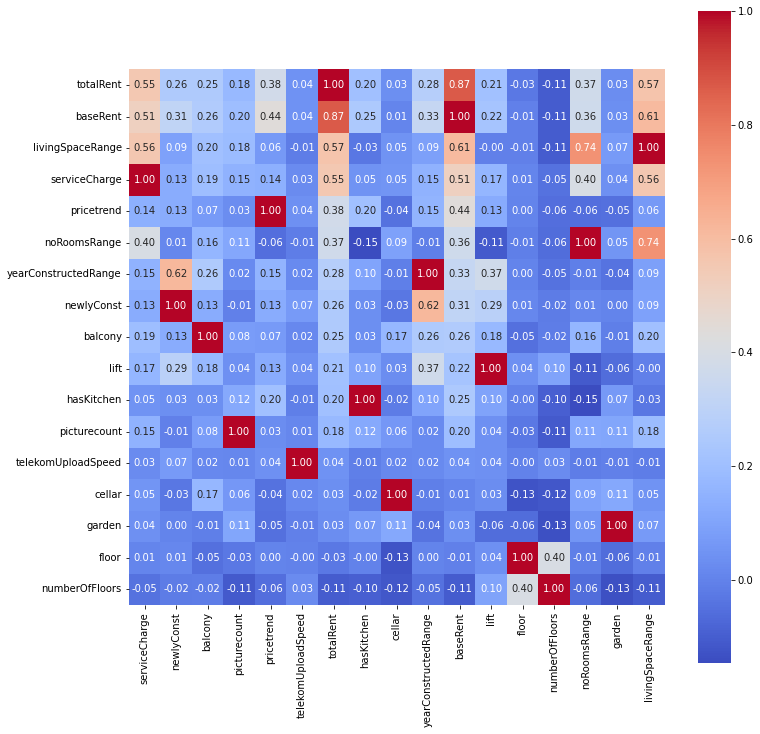

In [34]:
plt.subplots(figsize=(12, 12))
sns.heatmap(ndf.corr().sort_values(by='totalRent',ascending=False), square = True,fmt='.2f' ,annot = True, cmap='coolwarm')

<AxesSubplot:xlabel='totalRent', ylabel='baseRent'>

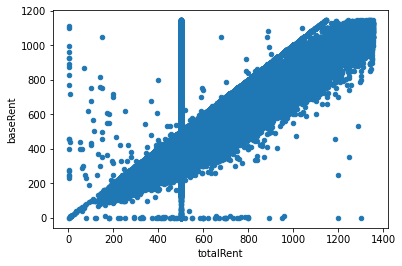

In [35]:
ndf.plot.scatter(x='totalRent', y='baseRent')

<AxesSubplot:xlabel='serviceCharge', ylabel='baseRent'>

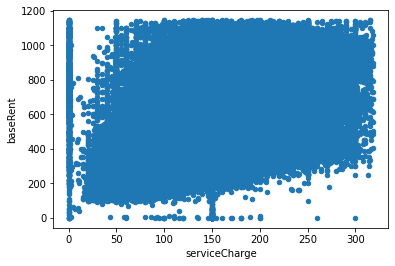

In [36]:
ndf.plot.scatter(x='serviceCharge', y='baseRent')

<AxesSubplot:xlabel='serviceCharge', ylabel='totalRent'>

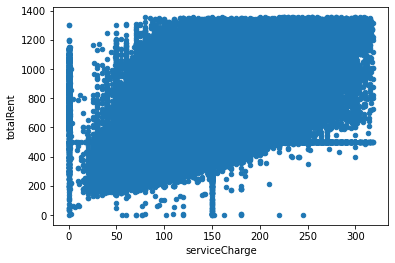

In [37]:
ndf.plot.scatter(x='serviceCharge', y='totalRent')

C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='geo_krs', ylabel='totalRent'>

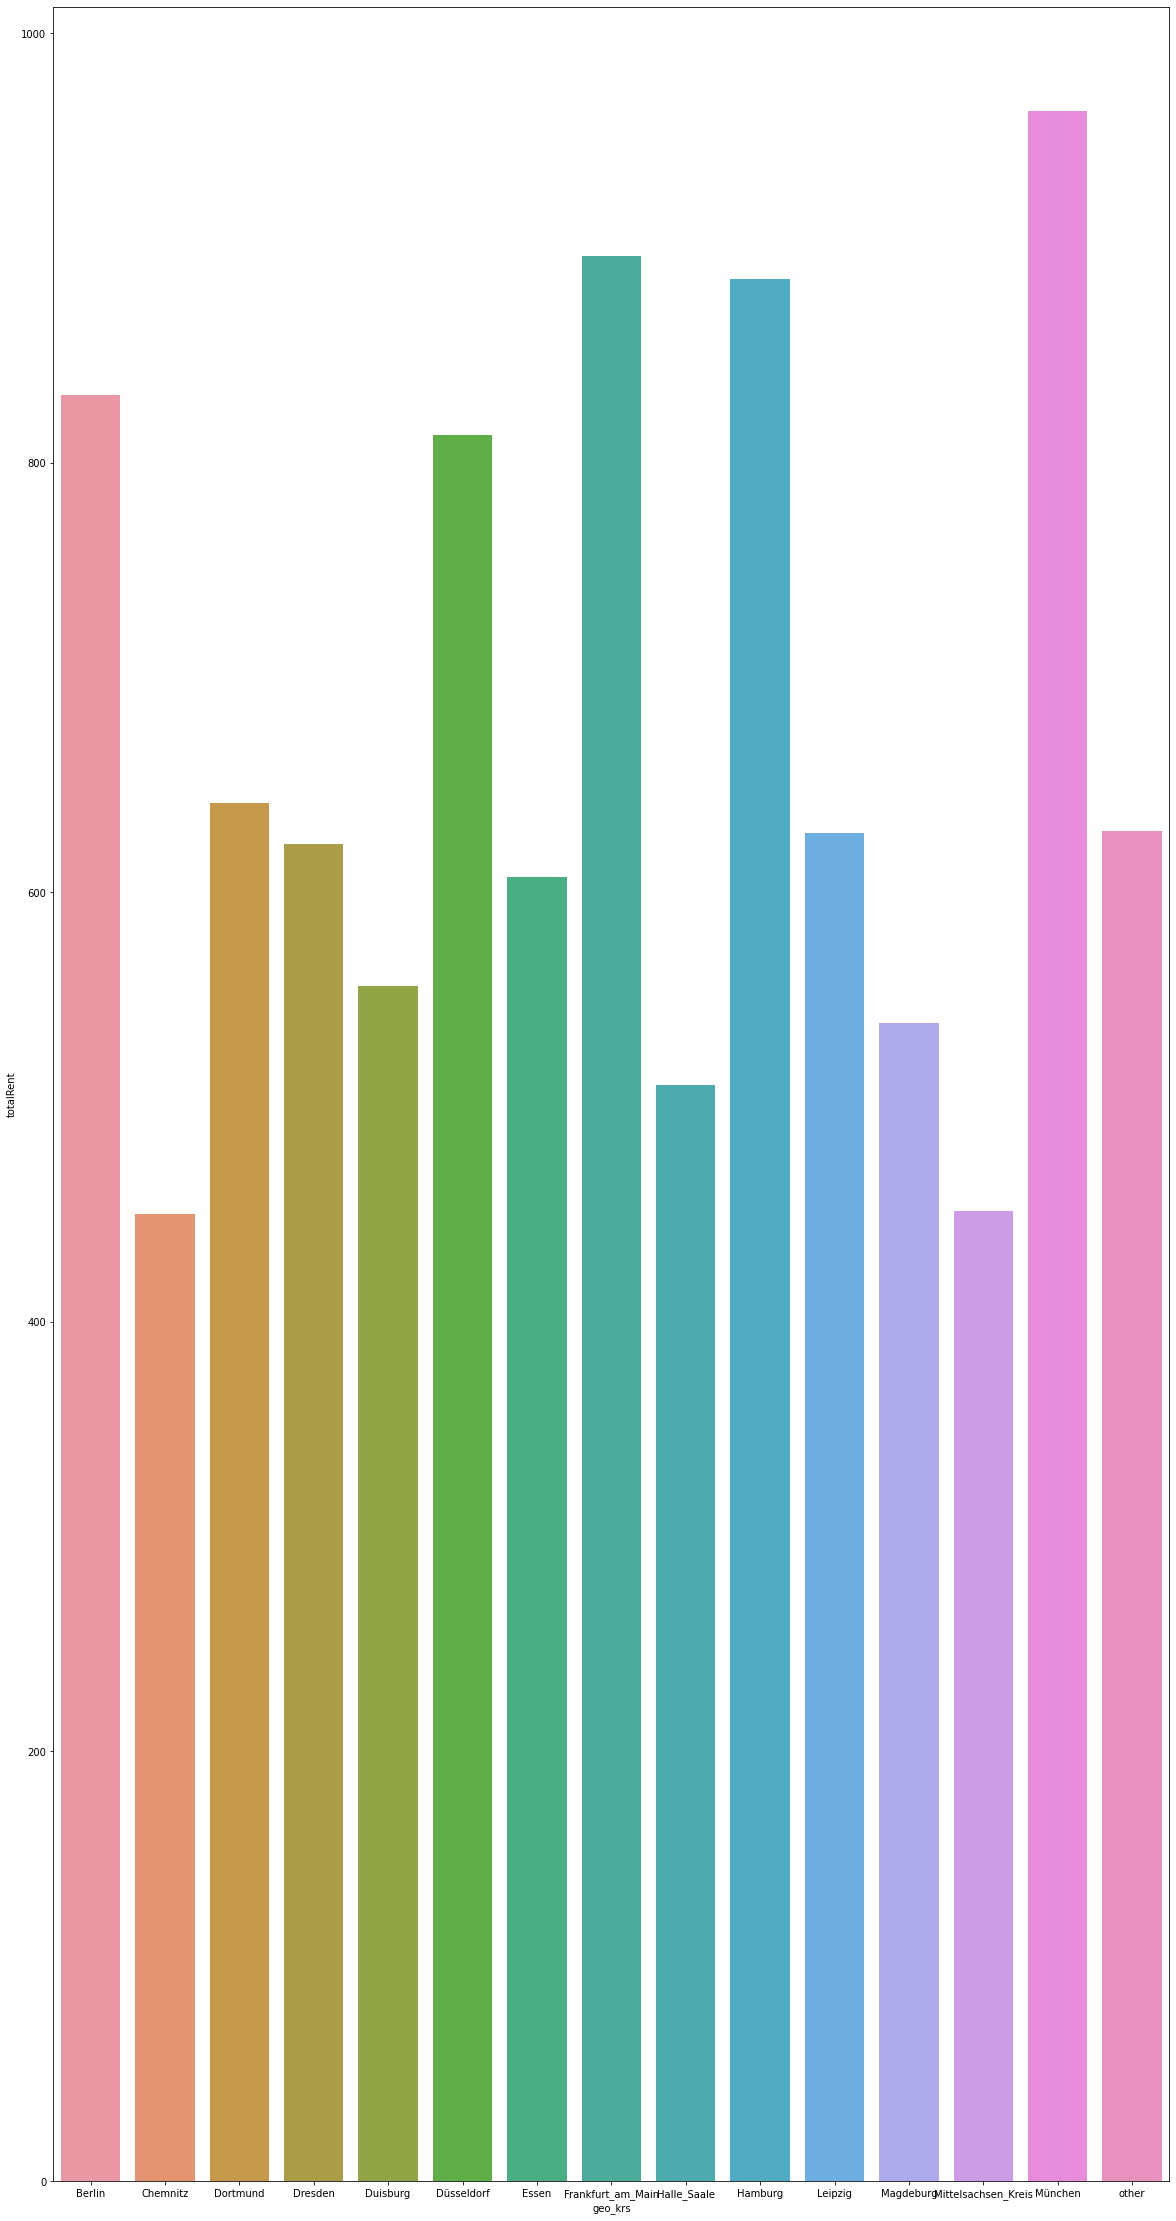

In [38]:
plt.figure(figsize=(20, 40))
sns.barplot('geo_krs', 'totalRent', data=ndf, ci=False)

C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='condition', ylabel='totalRent'>

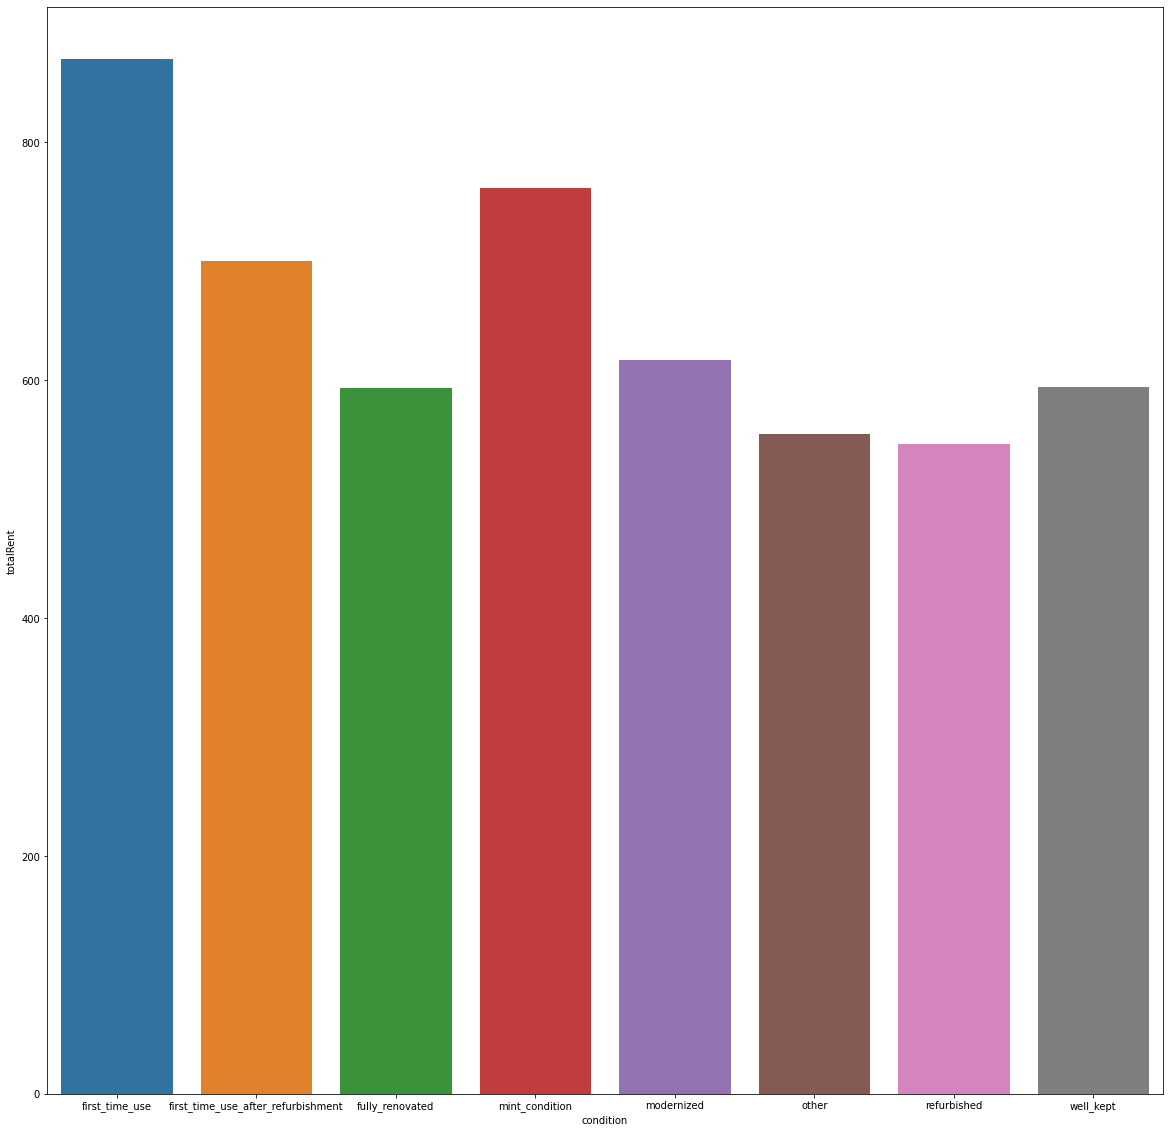

In [39]:
plt.figure(figsize=(20, 20))
sns.barplot('condition', 'totalRent', data=ndf, ci=False)

C:\Fuzulsanj\study\term 6\ML\CS-SBU-MachineLearning-BSc-2022\submits\98222036\ML_venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lift', ylabel='totalRent'>

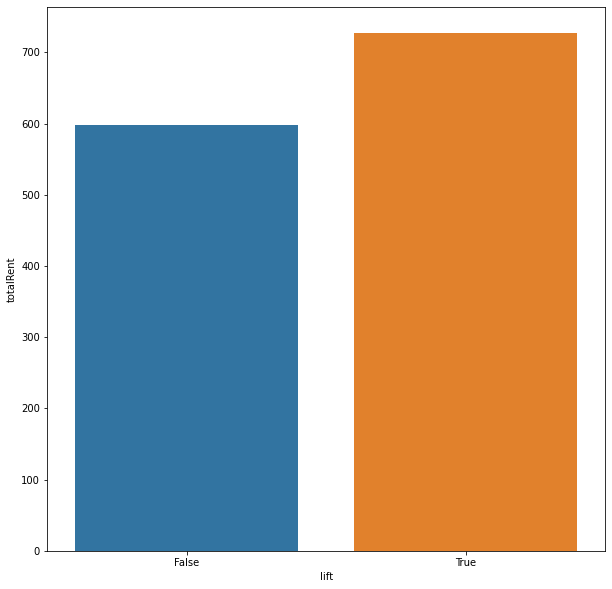

In [40]:
plt.figure(figsize=(10, 10))
sns.barplot('lift', 'totalRent', data=ndf, ci=False)

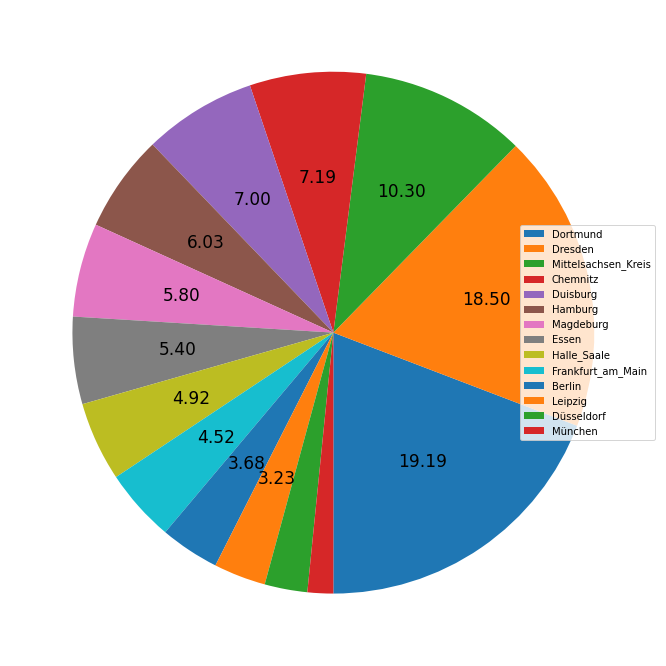

In [41]:
temp = ndf.drop(ndf[ndf.geo_krs == 'other'].index)
temp.geo_krs = temp.geo_krs.astype('object')
temp.geo_krs = temp.geo_krs.astype('category')

def autopct(pct): # only show the label when it's > 3%
    return ('%.2f' % pct) if pct > 3 else ''

my_labels = tuple(temp.geo_krs.unique().tolist())

ax = temp.geo_krs.value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct, labels=None, startangle=270, fontsize=17)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=5, labels=my_labels)

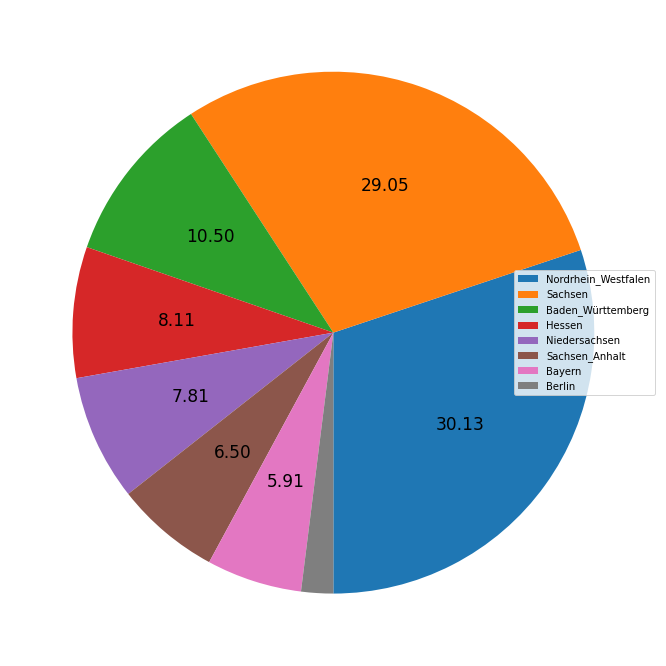

In [42]:
temp = ndf.drop(ndf[ndf.regio1 == 'other'].index)
temp.regio1 = temp.regio1.astype('object')
temp.regio1 = temp.regio1.astype('category')

def autopct(pct): # only show the label when it's > 3%
    return ('%.2f' % pct) if pct > 3 else ''

my_labels = tuple(temp.regio1.unique().tolist())

ax = temp.regio1.value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct, labels=None, startangle=270, fontsize=17)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=5, labels=my_labels)

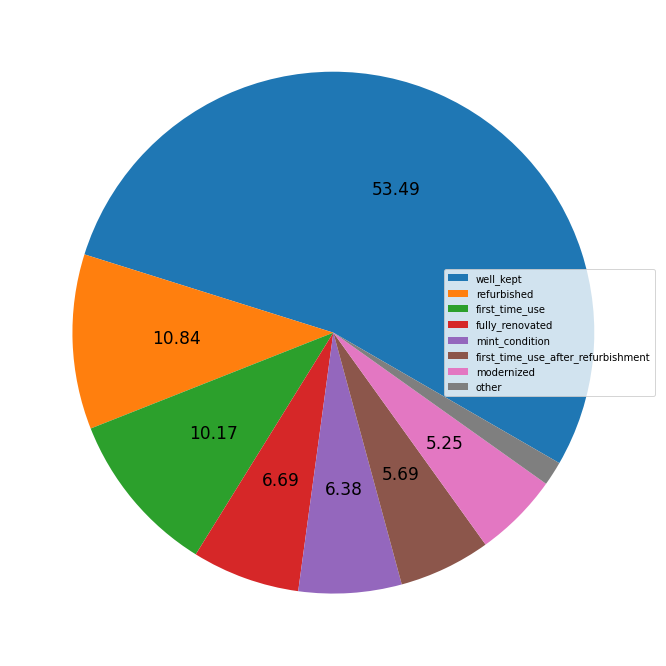

In [43]:
def autopct(pct): # only show the label when it's > 3%
    return ('%.2f' % pct) if pct > 3 else ''

my_labels = tuple(ndf.condition.unique().tolist())

ax = ndf.condition.value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct, labels=None, startangle=-30, fontsize=17)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=5, labels=my_labels)

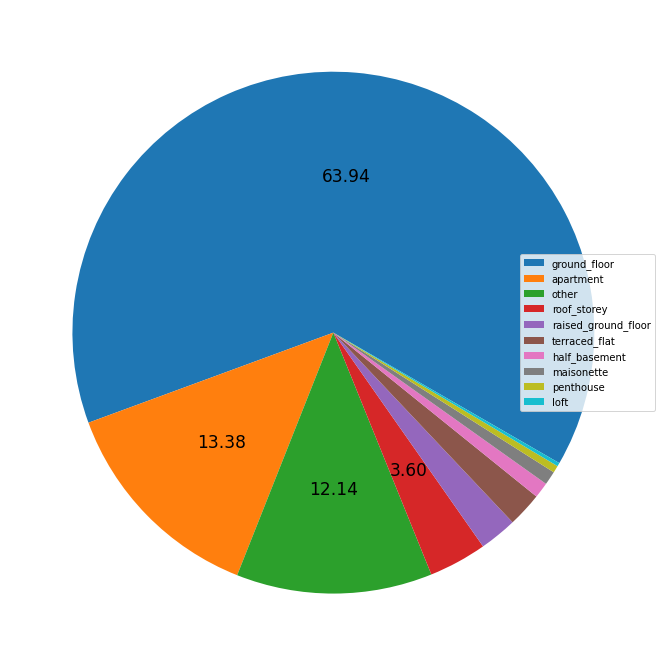

In [44]:
def autopct(pct): # only show the label when it's > 3%
    return ('%.2f' % pct) if pct > 3 else ''

my_labels = tuple(ndf.typeOfFlat.unique().tolist())

ax = ndf.typeOfFlat.value_counts().plot(kind='pie', figsize=(28,12), autopct=autopct, labels=None, startangle=-30, fontsize=17)
ax.axes.get_yaxis().set_visible(False)
plt.legend(loc=5, labels=my_labels)

# Model
RandomForestRegressor

In [83]:
from sklearn.ensemble import RandomForestRegressor

## train_test_split

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
target = ndf.totalRent
predictors = ndf.drop(['totalRent', 'baseRent', 'serviceCharge'], axis=1)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

## Hyperparameter tuning + Handeling Categorical Data

In [92]:
for col in X_train.columns:
    if (X_train[col].dtype == 'bool'):
        X_train[col] = X_train[col].astype('int8')
for col in X_test.columns:
    if (X_test[col].dtype == 'bool'):
        X_test[col] = X_test[col].astype('int8')

In [93]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177997 entries, 75268 to 146884
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   regio1                177997 non-null  category
 1   heatingType           177997 non-null  category
 2   telekomTvOffer        177997 non-null  category
 3   newlyConst            177997 non-null  int8    
 4   balcony               177997 non-null  int8    
 5   picturecount          177997 non-null  int64   
 6   pricetrend            177997 non-null  float64 
 7   telekomUploadSpeed    177997 non-null  int8    
 8   firingTypes           177997 non-null  category
 9   hasKitchen            177997 non-null  int8    
 10  cellar                177997 non-null  int8    
 11  yearConstructedRange  177997 non-null  int8    
 12  geo_krs               177997 non-null  category
 13  condition             177997 non-null  category
 14  interiorQual          177997 non

### Onehot Encoding

In [94]:
columns = [col for col in X_train.columns if X_train[col].dtype == 'int8' or X_train[col].dtype == 'category']

In [95]:
X_train_onehot = X_train.copy()
X_test_onehot = X_test.copy()

In [96]:
X_train_onehot = pd.concat([X_train_onehot.drop(columns=columns, axis=1), pd.get_dummies(X_train_onehot, columns=columns)], axis=1)
X_test_onehot = pd.concat([X_test_onehot.drop(columns=columns, axis=1), pd.get_dummies(X_test_onehot, columns=columns)], axis=1)

### Hybrid Encoding

In [97]:
columns = [col for col in X_train.columns if X_train[col].dtype == 'category']

In [98]:
X_train_hybrid = X_train.copy()
X_test_hybrid = X_test.copy()

In [99]:
X_train_hybrid = pd.concat([X_train_hybrid.drop(columns=columns, axis=1), pd.get_dummies(X_train_hybrid, columns=columns)], axis=1)
X_test_hybrid = pd.concat([X_test_hybrid.drop(columns=columns, axis=1), pd.get_dummies(X_test_hybrid, columns=columns)], axis=1)

### Label Encoding

In [100]:
columns = [col for col in X_train.columns if X_train[col].dtype == 'category']

In [101]:
X_train_label = X_train.copy()
X_test_label = X_test.copy()

In [102]:
for col in columns:
    X_train_label[col] = X_train_label[col].cat.codes
    X_test_label[col] = X_test_label[col].cat.codes

### Tuning

In [104]:
from sklearn.metrics import mean_squared_error

In [109]:
datasets = [(X_train_onehot, X_test_onehot, 'onehot'), (X_train_hybrid, X_test_hybrid, 'hybrid'), (X_train_label, X_test_label, 'label')]
max_depth = [1, 2, 3, 4, 5, 6, 7]#, 8, 9, 10] # max depth of tree
min_samples_split = [2, 0.1, 0.15, 0.2]#, 0.25, 0.3] # minimum number of samples needed in a node to split
max_features = [None, 'sqrt', 'log2']#, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] # number of features to be considered when training a tree
n_jobs = -1 # number of threads for parallel run = number of cores
n_estimators = 100 # number of trees
criterion = 'squared_error' # MSE
max_samples = [None]#, 0.1, 0.3, 0.5, 0.7, 0.9] # number of samples to train each tree
ccp_alpha = [0.0, 0.15]#, 0.2]#, 0.3, 0.4, 0.5] # for avoiding overfit

In [110]:
mse = float('inf')
best_params = None
for data in datasets:
    for depth in max_depth:
        for min_sam in min_samples_split:
            for max_fe in max_features:
                for max_sam in max_samples:
                    for alpha in ccp_alpha:
                        regressor = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, random_state=42, n_jobs=n_jobs
                            , max_depth=depth, min_samples_split=min_sam, max_features=max_fe, max_samples=max_sam, ccp_alpha=alpha)
                        regressor.fit(data[0], y_train)
                        new_mse = mean_squared_error(y_true=y_test, y_pred=regressor.predict(data[1]))
                        if mse > new_mse:
                            best_params = [data[2], depth, min_sam, max_fe, max_sam, alpha]
                            mse = new_mse

In [111]:
mse

25392.972878398366

In [112]:
best_params

['label', 7, 2, None, None, 0.0]

### Model Result Visualization

In [143]:
regressor = RandomForestRegressor(n_estimators=n_estimators, criterion=criterion, random_state=42, n_jobs=n_jobs
                            , max_depth=best_params[1], min_samples_split=best_params[2], max_features=best_params[3]
                            , max_samples=best_params[4], ccp_alpha=best_params[5])
regressor.fit(datasets[2][0], y_train)
y_pred = regressor.predict(datasets[2][1])
mse = mean_squared_error(y_true=y_test, y_pred=y_pred, squared=True)

In [145]:
mse

25392.972878398366

In [148]:
# rmse
mean_squared_error(y_true=y_test, y_pred=y_pred, squared=False)

159.3517269388643

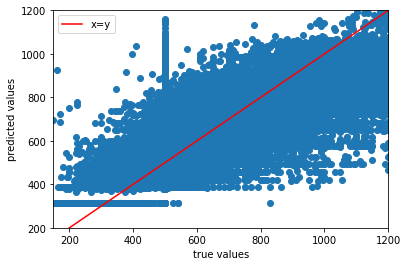

In [158]:
plt.plot((0, 1400), (0, 1400), 'r', label='x=y')
plt.scatter(y_test, y_pred)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.axis([150, 1200, 200, 1200])
plt.show()

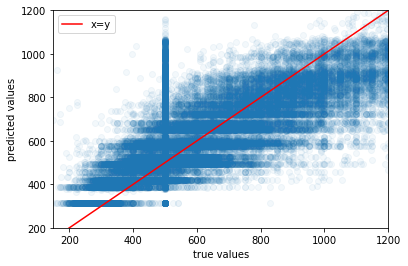

In [157]:
plt.plot((0, 1400), (0, 1400), 'r', label='x=y')
plt.scatter(y_test, y_pred, alpha=0.05)
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
plt.axis([150, 1200, 200, 1200])
plt.show()

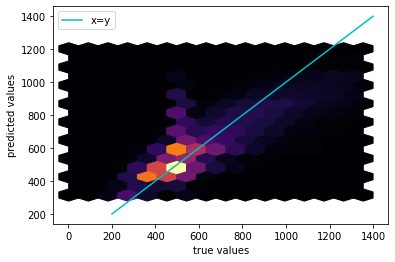

In [202]:
plt.plot((200, 1400), (200, 1400), 'c', label='x=y')
plt.hexbin(y_test, y_pred, gridsize=15, cmap='inferno')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.legend()
# plt.axis([150, 1200, 200, 1200])
plt.show()